In [11]:
import sys
import os

# Append the project root to sys.path (one level up from notebooks)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Project root added to sys.path:", project_root)


Project root added to sys.path: c:\Users\rober\OneDrive\Desktop\516_fp\EuroSat_Segmentation_Project


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Import your segmentation functions from the src package
from src.segmentation.kmeans import kmeans_segmentation
from src.segmentation.fuzzy_cmeans import fuzzy_cmeans_segmentation

# Verify that the imports work by printing a success message
print("Segmentation modules imported successfully.")


Segmentation modules imported successfully.


In [13]:
# Define path to the EuroSAT (RGB) dataset folder
data_dir = "../data/raw/EuroSAT"

# List the available classes (folder names)
classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
print("Available Classes in EuroSAT:", classes)


Available Classes in EuroSAT: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


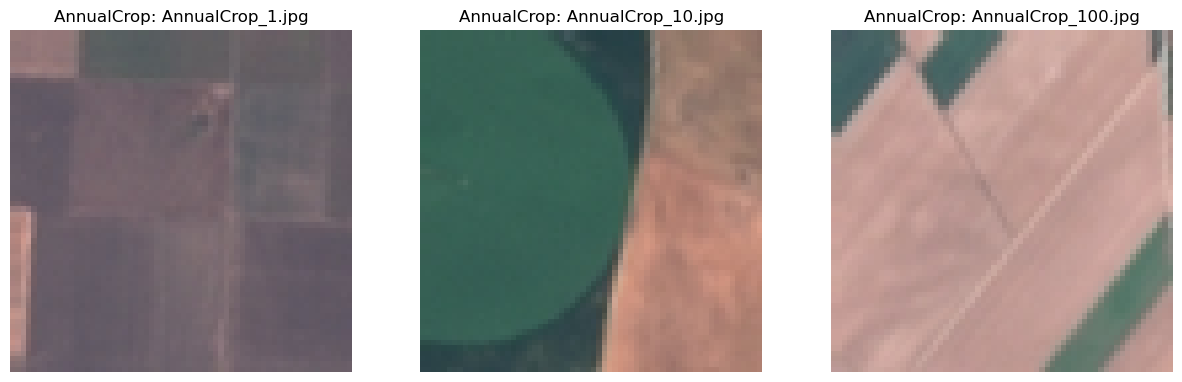

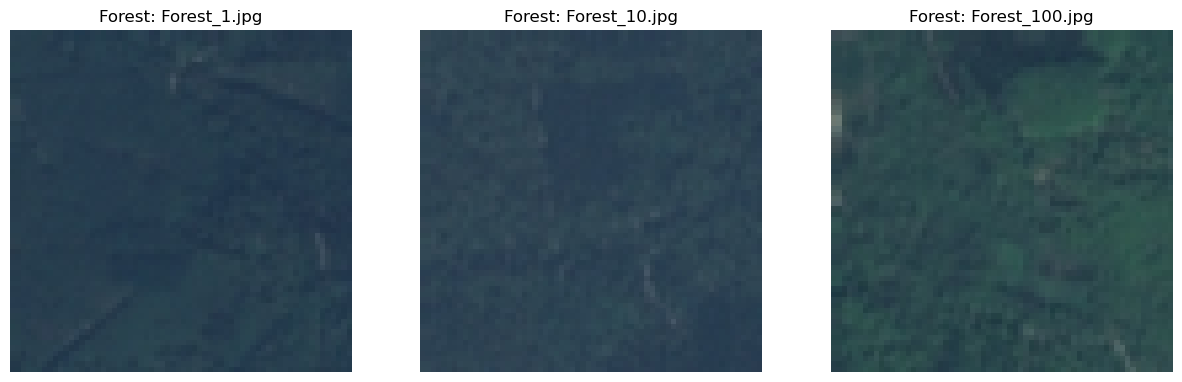

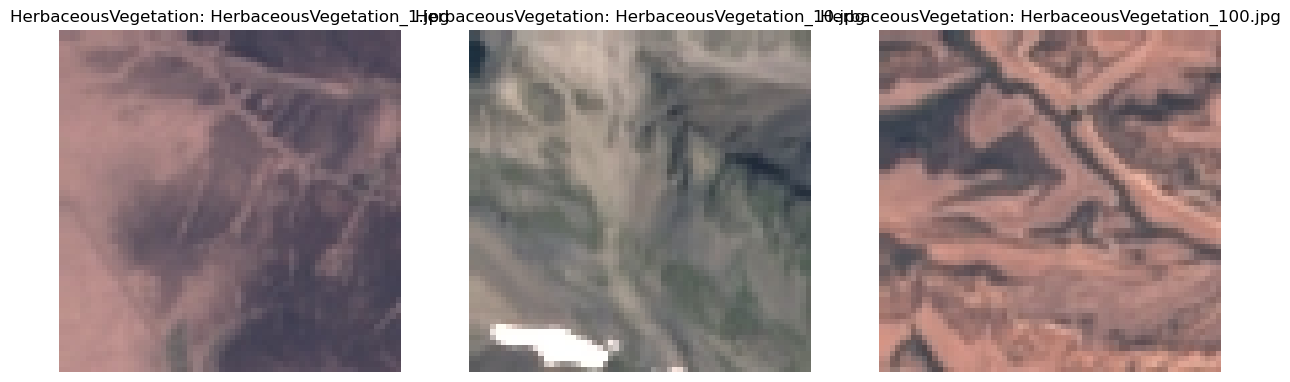

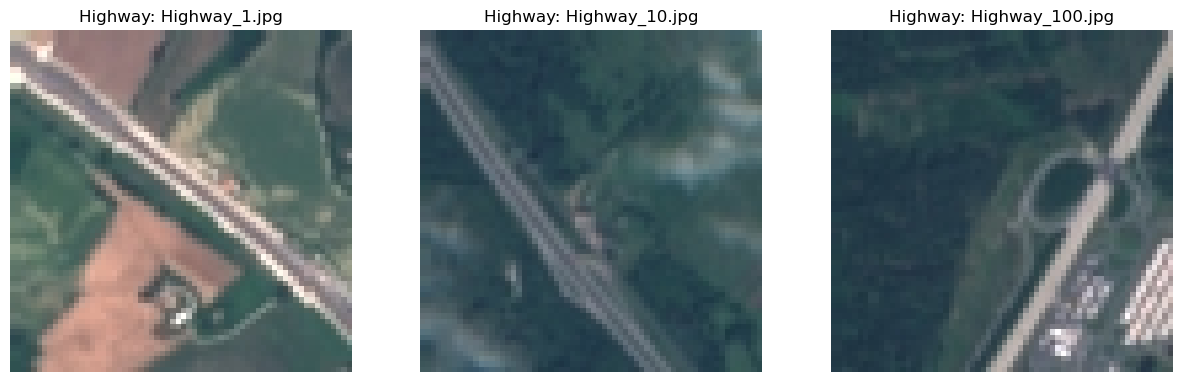

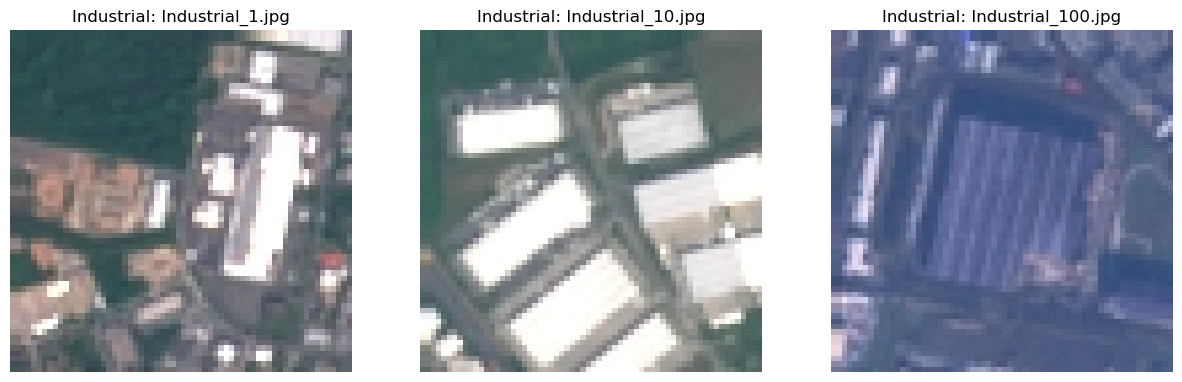

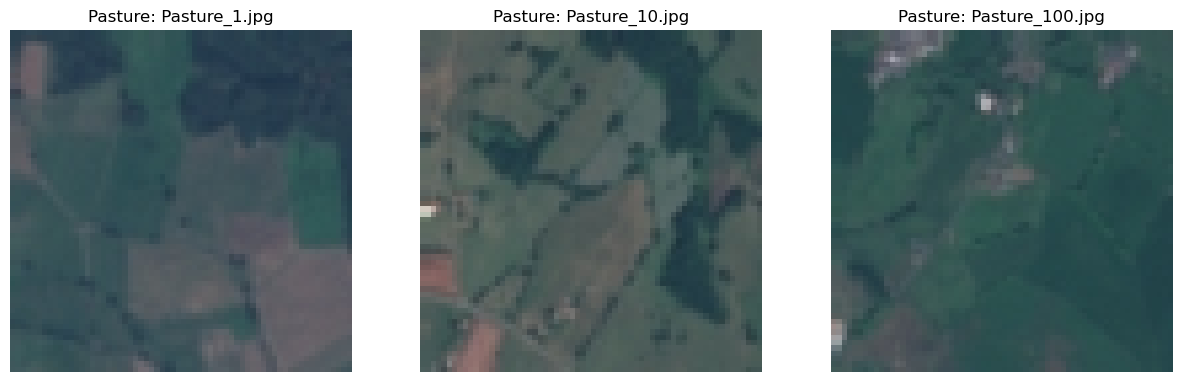

In [14]:
def show_sample_images(class_name, num_images=3):
    class_path = os.path.join(data_dir, class_name)
    image_files = os.listdir(class_path)[:num_images]
    plt.figure(figsize=(15, 5))
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(1, num_images, i+1)
            plt.imshow(img)
            plt.title(f"{class_name}: {img_file}")
            plt.axis("off")
        else:
            print(f"Failed to load {img_path}")
    plt.show()

# Display sample images for the first two classes
for cls in classes[:6]:
    show_sample_images(cls)


Processing class 'AnnualCrop' with 3 images...
Converged in 4 iterations.
Fuzzy C-Means converged in 77 iterations.


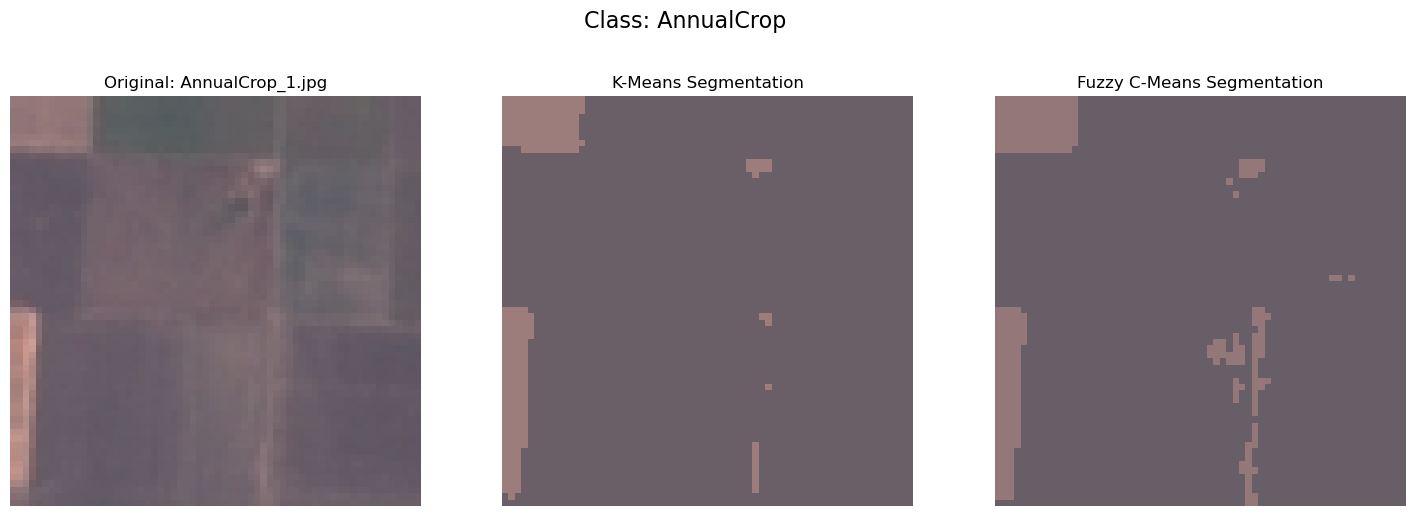

Converged in 5 iterations.
Fuzzy C-Means converged in 11 iterations.


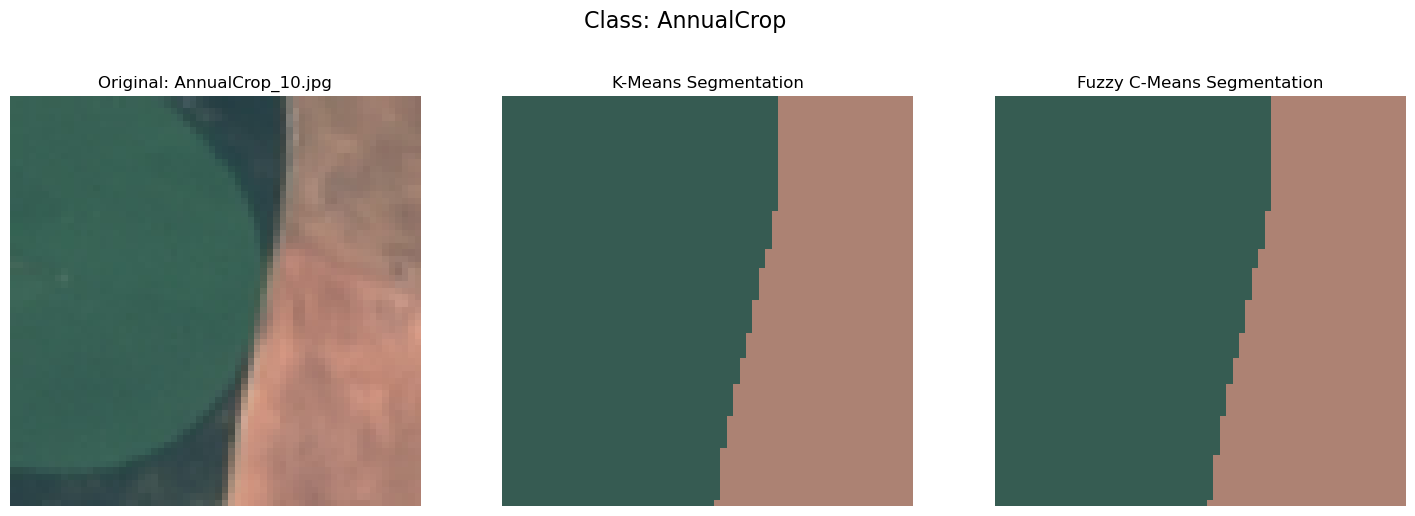

Converged in 6 iterations.
Fuzzy C-Means converged in 12 iterations.


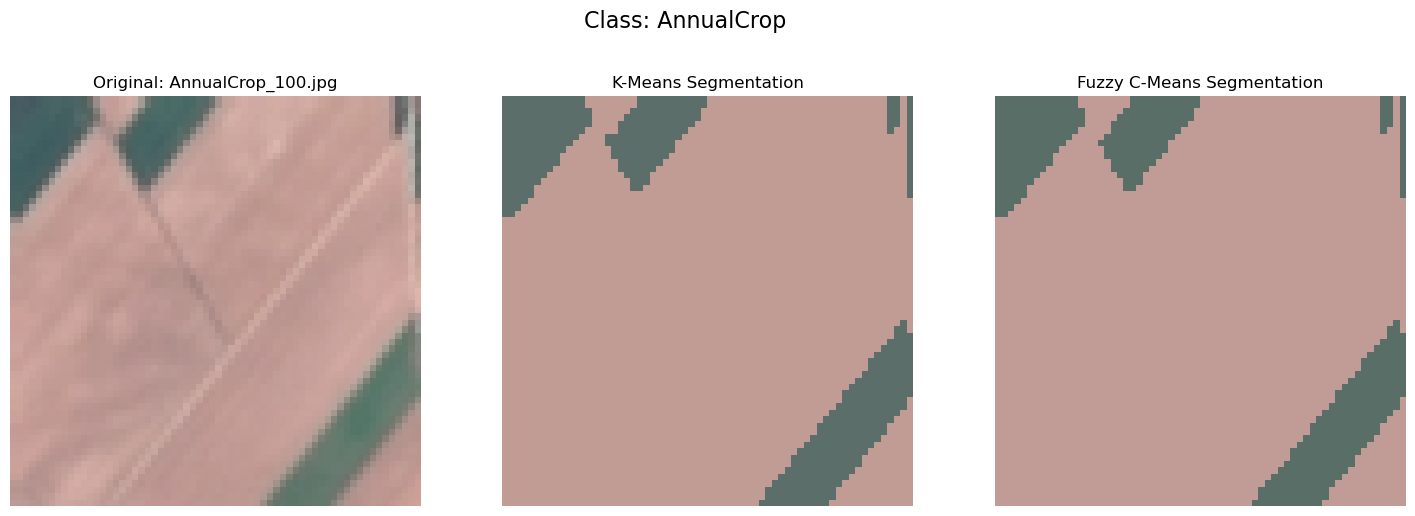

Processing class 'Forest' with 3 images...
Converged in 10 iterations.


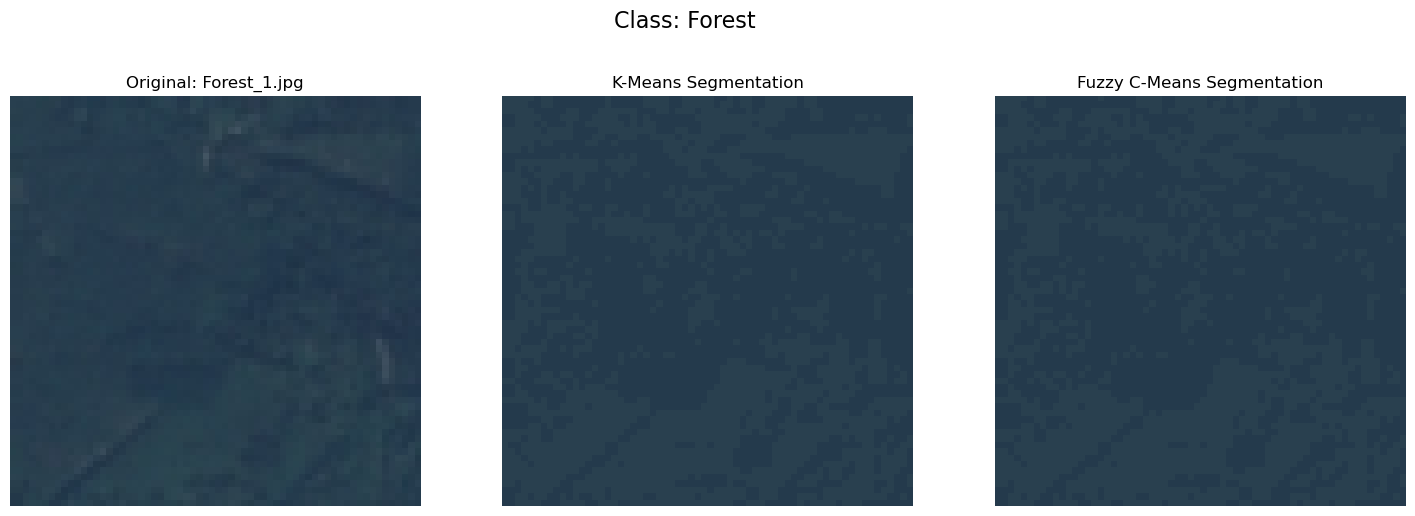

Converged in 7 iterations.


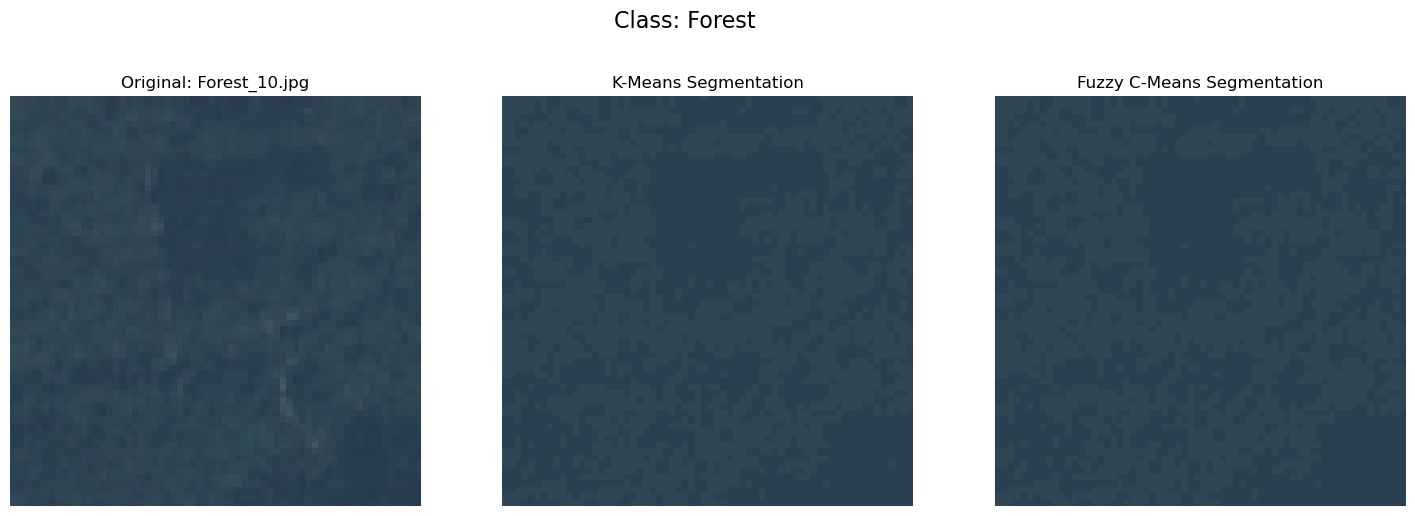

Converged in 10 iterations.
Fuzzy C-Means converged in 27 iterations.


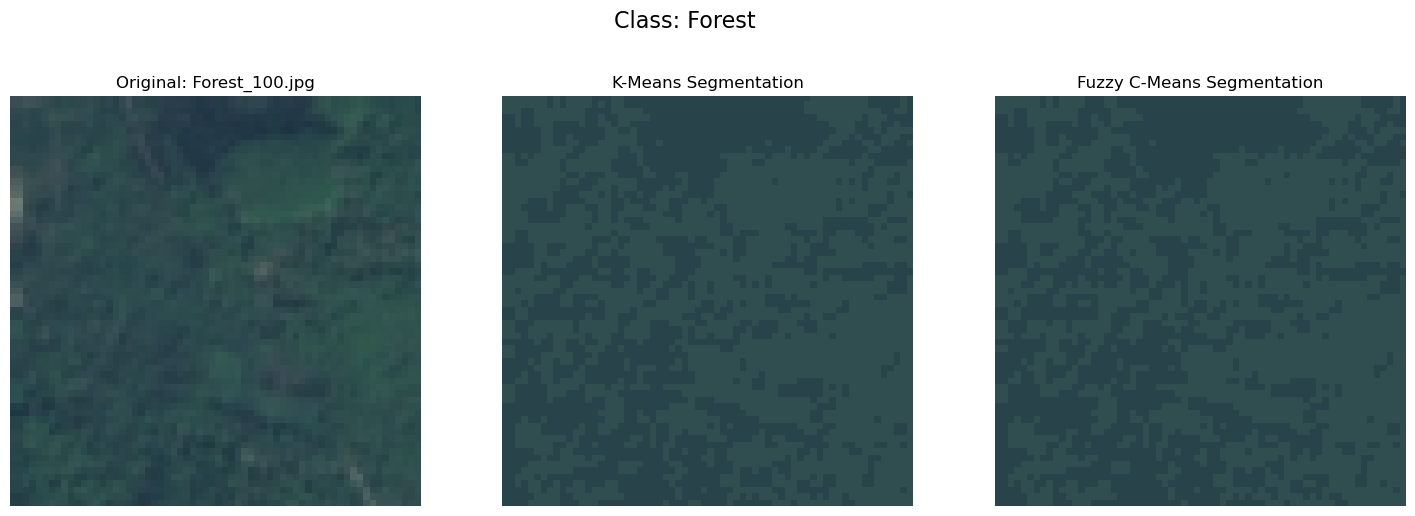

Processing class 'HerbaceousVegetation' with 3 images...
Converged in 12 iterations.
Fuzzy C-Means converged in 24 iterations.


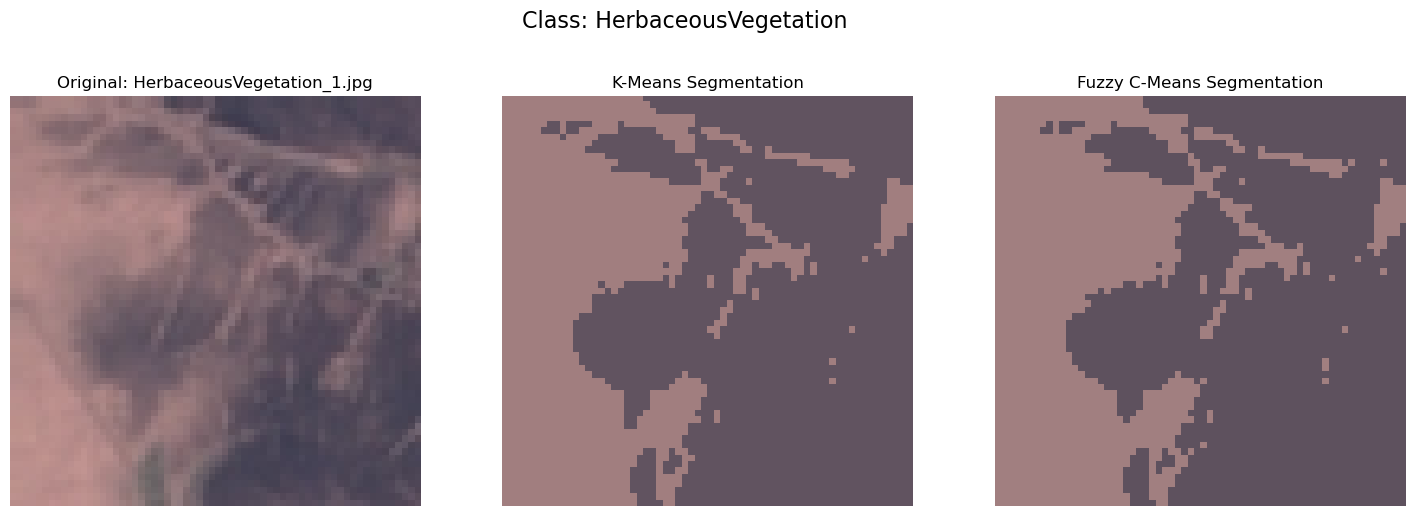

Converged in 9 iterations.
Fuzzy C-Means converged in 35 iterations.


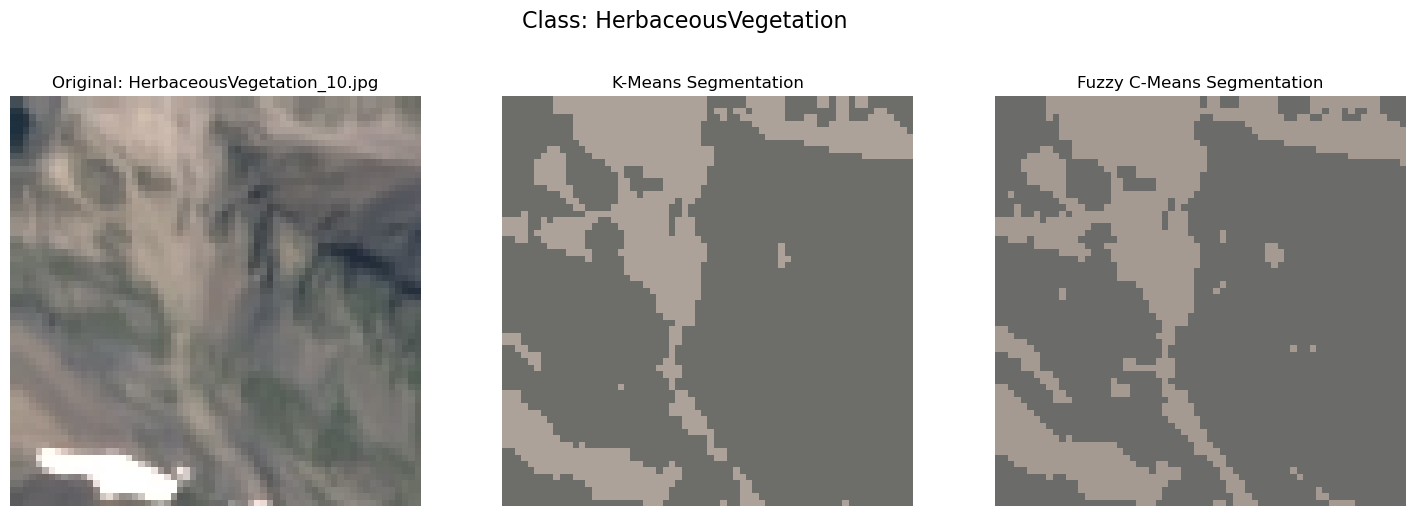

Converged in 10 iterations.
Fuzzy C-Means converged in 23 iterations.


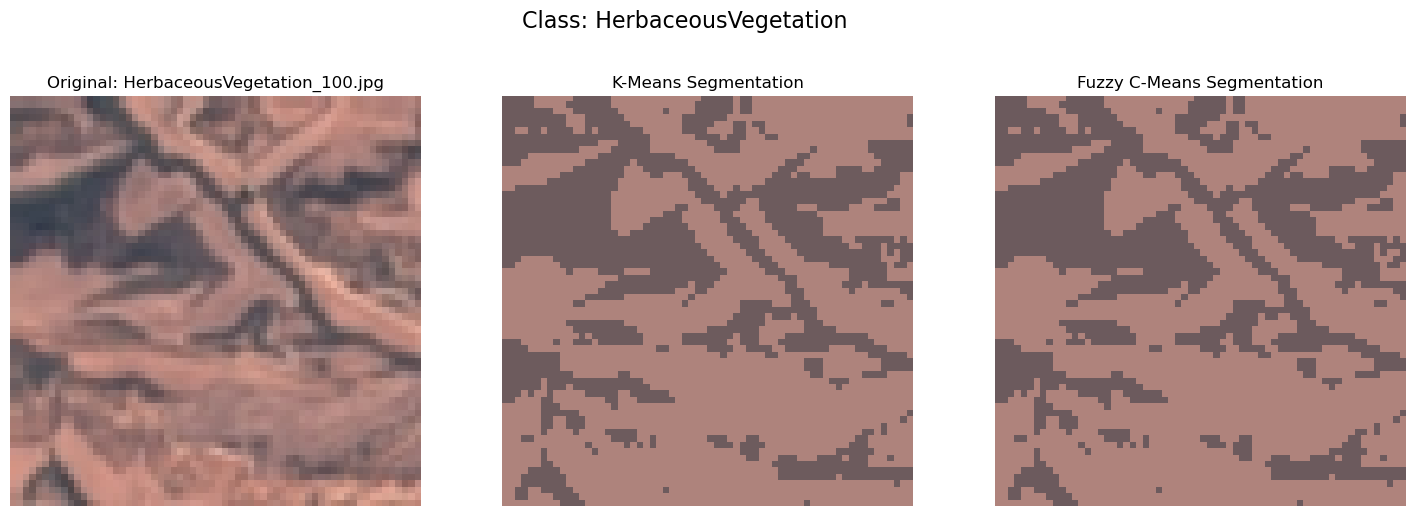

In [15]:
# Choose a subset of classes for testing (you can modify this list as needed)
test_classes = classes[:3]  # For example, use the first 3 classes
num_images_per_class = 3     # Number of sample images to process per class

# Set segmentation parameters.
k = 2      # Number of clusters for both methods
m = 2      # Fuzziness parameter for Fuzzy C-Means

for class_name in test_classes:
    class_path = os.path.join(data_dir, class_name)
    image_files = os.listdir(class_path)[:num_images_per_class]
    print(f"Processing class '{class_name}' with {len(image_files)} images...")
    
    for img_file in image_files:
        img_path = os.path.join(class_path, img_file)
        image = cv2.imread(img_path)
        if image is None:
            print(f"Failed to load {img_path}")
            continue

        # Convert the image from BGR to RGB.
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Apply K-Means segmentation.
        labels_km, centroids_km = kmeans_segmentation(image_rgb, k)
        segmented_image_km = centroids_km[labels_km]
        
        # Apply Fuzzy C-Means segmentation.
        labels_fcm, centroids_fcm, _ = fuzzy_cmeans_segmentation(image_rgb, k, m)
        segmented_image_fcm = centroids_fcm[labels_fcm]
        
        # Display original and segmented images side by side.
        plt.figure(figsize=(18, 6))
        
        plt.subplot(1, 3, 1)
        plt.imshow(image_rgb)
        plt.title(f"Original: {img_file}")
        plt.axis("off")
        
        plt.subplot(1, 3, 2)
        plt.imshow(segmented_image_km.astype(np.uint8))
        plt.title("K-Means Segmentation")
        plt.axis("off")
        
        plt.subplot(1, 3, 3)
        plt.imshow(segmented_image_fcm.astype(np.uint8))
        plt.title("Fuzzy C-Means Segmentation")
        plt.axis("off")
        
        plt.suptitle(f"Class: {class_name}", fontsize=16)
        plt.show()


## Observations

- **K-Means Segmentation:**  
  The segmented image shows distinct regions with uniform colors corresponding to the k centroids. The boundaries are relatively crisp.

- **Fuzzy C-Means Segmentation:**  
  The segmented image appears similar in the final output since we are taking the maximum membership to assign each pixel a label. However, the underlying membership matrix indicates soft clustering where pixels may have partial membership across clusters.

- **Comparison:**  
  The two methods have slightly different results, but one does not appear to have a distinct advantage over the other. They both performed similarly in terms of segmentation quality, with only minor differences observed in the output.

- **Performance:**  
  One major difference is the computation time. The Fuzzy C-Means method took significantly longer (34.4 seconds) than K-Means (which took 0.0 seconds over 21 iterations), highlighting a clear trade-off between the methods in terms of efficiency.
